## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train`
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` |


## Tools
In this lab you will make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement
<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"    style=" width:380px; padding: 10px;  " />

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


In [4]:
#x_train is the input variable(size in 1000 sq.feet)
#y_train is the target (price in 1000s of dollars)

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0,500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")


x_train = [1. 2.]
y_train = [300. 500.]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [5]:
# m is the number of training examples

print(f"x_trian.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is : {m}")

x_trian.shape: (2,)
Number of training examples is : 2


In [6]:
#one can use len() fuction too
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [7]:
i = 1 #change this i to see(x^1, y^1 )

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i},{y_i})")

(x^(1), y^(1)) = (2.0,500.0)


You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

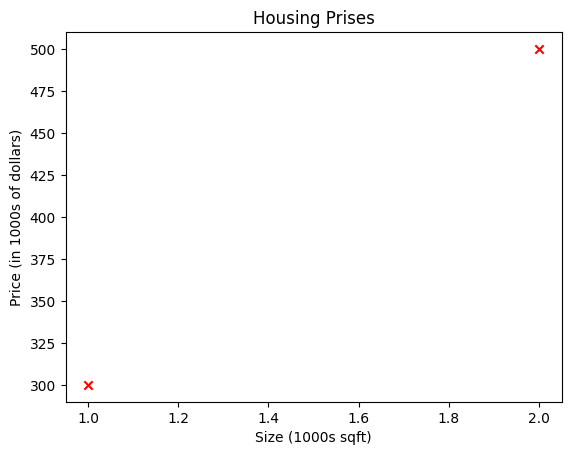

In [8]:
#plot the data point

plt.scatter(x_train,y_train, marker = 'x' , c = 'r')

#Set the title

plt.title("Housing Prises")

#Set the y-axis

plt.ylabel('Price (in 1000s of dollars)')
#set the x-axis

plt.xlabel('Size (1000s sqft)')

plt.show()

## Model function

<img align="left" src="./images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " > As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [9]:
w = 200
b = 100

print(f"w: {w}")
print(f"b: {b}")


w: 200
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [10]:
def compute_model_output(x, w, b):
  '''
  computes the prediction of a linear model args:
  x(ndarray (m,)): Data, m examples
  w,b (scalars) : model parameters
  Returns
    f_wb (ndarray (m,)) : model prediction
  '''

  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w *x[i] +b

  return f_wb

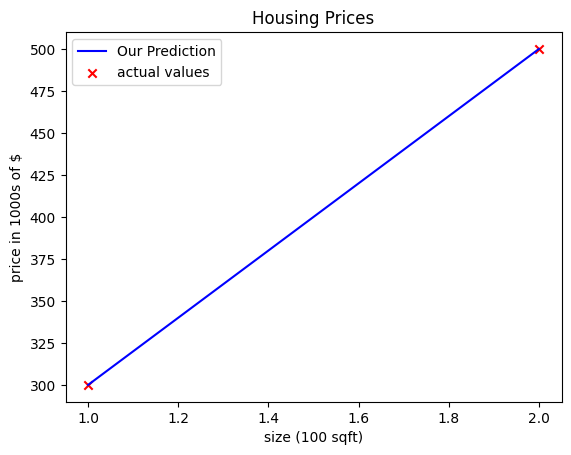

In [11]:
tmp_f_wb = compute_model_output(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c = 'b', label = 'Our Prediction')

plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = 'actual values')

plt.title('Housing Prices')

plt.ylabel("price in 1000s of $")

plt.xlabel("size (100 sqft)")

plt.legend()

plt.show()